In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder 
import warnings
warnings.filterwarnings(action='ignore')


In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 

df = pd.read_csv("C:/Users/USER/Downloads/CANCERRR/CANCER17_VALUES/colo_repeat_25val.csv")

In [2]:
df

ID  DV 1st day           1           2           4           8  \
0       3    0.162582  124.668629  234.962114  224.056905  209.302622   
1       4    0.124181  100.760795  203.645848  194.958083  182.889970   
2       5    0.088237   63.280291  119.978449  126.930401  115.456653   
3       6    0.125393  106.660126  213.980344  200.003000  178.430653   
4       7    0.130371   92.023519  191.092767  195.930834  158.455564   
...    ..         ...         ...         ...         ...         ...   
44923  26    0.041153   54.179775  100.164717   89.736813   73.810839   
44924  27    0.100026   80.126870  160.083516  124.489863   88.729382   
44925  28    0.051831   33.026856   71.062880   58.892960   54.169826   
44926  29    0.048167   68.840771  144.526144  129.420671  116.282747   
44927  30    0.048973   64.414575  122.848547  101.618419   77.850929   

               12  DV 2nd day  DV 3rd day  DV 4th day  ...         152  \
0      191.536949  123.068428  196.090066  210.118938  ...  382.951251   
1      140.791618  100.955709  125.658834  151.362916  ...  321.292037   
2      102.756246   81.673126  130.876106  174.606264  ...  324.648955   
3      160.079082  119.923822  157.849898  193.233795  ...  363.597558   
4      142.660614   91.545343  136.941755  182.601630  ...  352.990098   
...           ...         ...         ...         ...  ...         ...   
44923   64.723346   34.270046   42.161785   51.153846  ...  108.338556   
44924   59.278500   19.696179   23.929773   26.026664  ...  114.101309   
44925   43.337474   33.104183   52.606090   59.584397  ...  104.602362   
44926   93.078243   61.187747   81.229669   98.423540  ...  203.854256   
44927   55.342844   25.197243   36.411477   36.770703  ...  116.121454   

              156         167  AMOUNT  RATE  WEIGHT  AGE  SEX  CRCL    Group  
0      385.090627  268.626298    1000   500      55   54    M    38  1000 mg  
1      272.525506  190.628608    1000   500      57   38    F   112  1000 mg  
2      283.126667  249.693627    1000   500      99   33    M    57  1000 mg  
3      330.902458  235.397850    1000   500     100   59    F    48  1000 mg  
4      335.025960  251.007326    1000   500      93   28    M    54  1000 mg  
...           ...         ...     ...   ...     ...  ...  ...   ...      ...  
44923   88.701673   57.431458    1000   250      66   57    F    91   500 mg  
44924   77.377561   36.761315    1000   250      56   55    F    92   500 mg  
44925  107.611560   77.679118    1000   250      90   60    M    77   500 mg  
44926  177.157012  120.163700    1000   250      66   23    F    72   500 mg  
44927   84.795832   55.003260    1000   250      58   55    M    90   500 mg  

[44928 rows x 25 columns]

In [3]:

df['GROUP']= label_encoder.fit_transform(df['Group']) 
df['SEX'] = df['SEX'].replace({'M' : 0, 'F':1})
df.drop(["Group"],axis=1)
output_features = ['DV 1st day','1', '2','4','8','12','DV 2nd day','DV 3rd day','DV 4th day','DV 7th day','145','146','148','150','152','156','167']
input_features = [ 'RATE', 'WEIGHT', 'AGE', 'SEX', 'CRCL' ]

X = df[input_features]
y = df[output_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)



# model1 = LinearRegression()
# model1.fit(X, y)




LinearRegression()

In [20]:
models = {
    "Lasso":Lasso(alpha=0.1),
    "Ridge":Ridge(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5) ,
    "DecisionTreeRegressor": DecisionTreeRegressor(),
#     "RandomForestRegressor": RandomForestRegressor(),
#     "GradientBoostingRegressor": GradientBoostingRegressor(),
#     "LGBMRegressor": LGBMRegressor(),
#     "XGBRegressor": XGBRegressor(),
#     "AdaBoostRegressor": AdaBoostRegressor(),
#     "MLPRegressor": MLPRegressor(),
}

for name, model in models.items():
    model.fit(X, y)
    print(name + " trained.")

Lasso trained.
Ridge trained.
ElasticNet trained.
DecisionTreeRegressor trained.


In [22]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

Lasso: 76.77%
Ridge: 77.11%
ElasticNet: 76.97%
DecisionTreeRegressor: 100.00%


In [23]:
for name, model in models.items():
    print(name+": {}".format(model.predict([[500,60,21,0,74]])))

Lasso: [[1.41597061e-01 1.15671072e+02 2.26357298e+02 2.21415599e+02
  1.93683151e+02 1.67228125e+02 1.10931612e+02 1.66697217e+02
  2.04737078e+02 2.66706551e+02 3.85916472e+02 4.92578691e+02
  4.66270933e+02 4.28039828e+02 4.06996620e+02 3.76273133e+02
  2.87119653e+02]]
Ridge: [[1.49054217e-01 1.15203525e+02 2.25889191e+02 2.20988585e+02
  1.93256084e+02 1.66904904e+02 1.10504535e+02 1.67201064e+02
  2.04309976e+02 2.67210421e+02 3.85489398e+02 4.92151650e+02
  4.65843872e+02 4.27612802e+02 4.06569634e+02 3.75846095e+02
  2.86692577e+02]]
ElasticNet: [[1.41962674e-01 1.16972584e+02 2.29606093e+02 2.23008105e+02
  1.94771199e+02 1.67130666e+02 1.11424049e+02 1.66298434e+02
  2.04889145e+02 2.66606522e+02 3.85907496e+02 4.92984212e+02
  4.66418713e+02 4.29014851e+02 4.08992838e+02 3.76814396e+02
  2.87042091e+02]]
DecisionTreeRegressor: [[8.82372140e-02 6.32802912e+01 1.19978449e+02 1.26930401e+02
  1.15456652e+02 1.02756246e+02 8.16731259e+01 1.30876106e+02
  1.74606264e+02 2.1206493

# Linear Regression

In [ ]:
# 
import matplotlib.pyplot as plt

with1 = [2.58388756e-01 ,2.28915426e+02 ,4.40862796e+02, 3.71587076e+02,
 3.04066286e+02, 2.38308051e+02, 1.40525188e+02 ,1.99503175e+02,
 2.33112648e+02, 2.99649967e+02,5.19052911e+02, 6.74036953e+02,
 6.04602787e+02, 5.91188953e+02 ,5.43365562e+02, 4.79557985e+02,
 3.22923446e+02]
without = [1.49054300e-01 ,1.15203437e+02, 2.25888996e+02 ,2.20988482e+02,
  1.93256009e+02 ,1.66904900e+02, 1.10504493e+02 ,1.67201102e+02,
  2.04309953e+02 ,2.67210443e+02, 3.85489384e+02, 4.92151613e+02,
  4.65843849e+02 ,4.27612734e+02 ,4.06569509e+02 ,3.75846050e+02,
  2.86692567e+02]  
actual = [0.225978,231.6189895,456.0336056,345.4322729,249.0057743,179.178662,0.9428587,91.99521615,98.65663238,
          121.2178433,342.4668723,474.6378493,419.1062913,403.4532815,364.1465306,277.4781514,127.511158]# Example with different values for comparison
output_features = ['DV 1st day','1', '2','4','8','12','DV 2nd day','DV 3rd day','DV 4th day','DV 7th day','145','146','148','150','152','156','167']

plt.plot(output_features,with1, label='Predicted with the trained model', marker='o', linestyle='-')
plt.plot(output_features,without, label='predicted without being in the training model' ,marker='o', linestyle='-')
plt.legend()
plt.title('Comparison of training and without training output')
plt.xlabel('timing')
plt.xticks(rotation=90)  
plt.ylabel('DV')
plt.show()

#  Lasso Regression

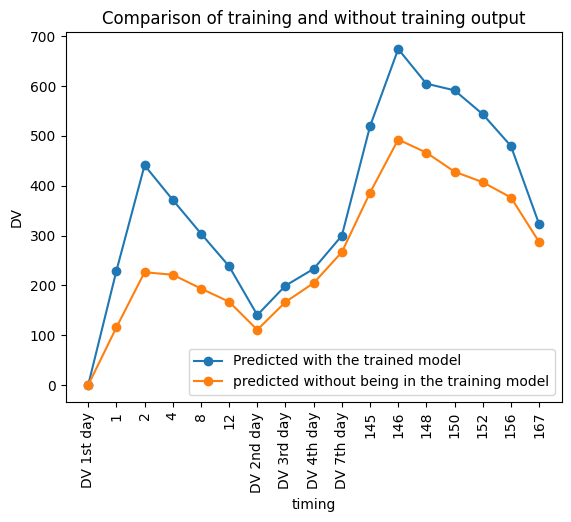

In [24]:
# 
import matplotlib.pyplot as plt

with1 = [2.58388756e-01 ,2.28915426e+02 ,4.40862796e+02, 3.71587076e+02,
 3.04066286e+02, 2.38308051e+02, 1.40525188e+02 ,1.99503175e+02,
 2.33112648e+02, 2.99649967e+02,5.19052911e+02, 6.74036953e+02,
 6.04602787e+02, 5.91188953e+02 ,5.43365562e+02, 4.79557985e+02,
 3.22923446e+02]
without = [1.41597061e-01, 1.15671072e+02, 2.26357298e+02,2.21415599e+02,
  1.93683151e+02 ,1.67228125e+02, 1.10931612e+02 ,1.66697217e+02,
  2.04737078e+02, 2.66706551e+02, 3.85916472e+02, 4.92578691e+02,
  4.66270933e+02, 4.28039828e+02, 4.06996620e+02 ,3.76273133e+02,
  2.87119653e+02]  
# actual = [0.225978,231.6189895,456.0336056,345.4322729,249.0057743,179.178662,0.9428587,91.99521615,98.65663238,
#           121.2178433,342.4668723,474.6378493,419.1062913,403.4532815,364.1465306,277.4781514,127.511158]# Example with different values for comparison
output_features = ['DV 1st day','1', '2','4','8','12','DV 2nd day','DV 3rd day','DV 4th day','DV 7th day','145','146','148','150','152','156','167']

plt.plot(output_features,with1, label='Predicted with the trained model', marker='o', linestyle='-')
plt.plot(output_features,without, label='predicted without being in the training model' ,marker='o', linestyle='-')
plt.legend()
plt.title('Comparison of training and without training output')
plt.xlabel('timing')
plt.xticks(rotation=90)  
plt.ylabel('DV')
plt.show()

# Ridge Regression

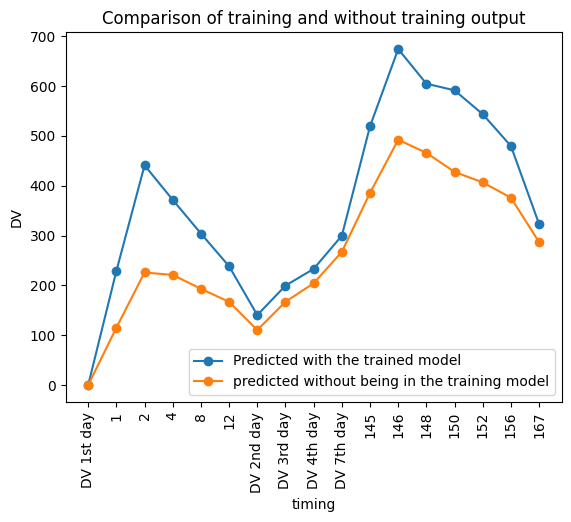

In [27]:
# 
import matplotlib.pyplot as plt

with1 = [2.58388756e-01 ,2.28915426e+02 ,4.40862796e+02, 3.71587076e+02,
 3.04066286e+02, 2.38308051e+02, 1.40525188e+02 ,1.99503175e+02,
 2.33112648e+02, 2.99649967e+02,5.19052911e+02, 6.74036953e+02,
 6.04602787e+02, 5.91188953e+02 ,5.43365562e+02, 4.79557985e+02,
 3.22923446e+02]
without = [1.49054217e-01 ,1.15203525e+02 ,2.25889191e+02 ,2.20988585e+02,
  1.93256084e+02, 1.66904904e+02, 1.10504535e+02 ,1.67201064e+02,
  2.04309976e+02, 2.67210421e+02 ,3.85489398e+02, 4.92151650e+02,
  4.65843872e+02 ,4.27612802e+02, 4.06569634e+02, 3.75846095e+02,
  2.86692577e+02]  
# actual = [0.225978,231.6189895,456.0336056,345.4322729,249.0057743,179.178662,0.9428587,91.99521615,98.65663238,
#           121.2178433,342.4668723,474.6378493,419.1062913,403.4532815,364.1465306,277.4781514,127.511158]# Example with different values for comparison
output_features = ['DV 1st day','1', '2','4','8','12','DV 2nd day','DV 3rd day','DV 4th day','DV 7th day','145','146','148','150','152','156','167']

plt.plot(output_features,with1, label='Predicted with the trained model', marker='o', linestyle='-')
plt.plot(output_features,without, label='predicted without being in the training model' ,marker='o', linestyle='-')
plt.legend()
plt.title('Comparison of training and without training output')
plt.xlabel('timing')
plt.xticks(rotation=90)  
plt.ylabel('DV')
plt.show()